In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
sns.set_style("white") # seaborn 有五个主题可以设置 white是其中的一个

%matplotlib inline

In [48]:
def np2u8(image):
    return np.uint8(np.abs(image))

# 实验目的
该例的目的是说明用前述算法来寻找大小适合车牌的矩形的应用。该矩形可以通过检测强的水平和垂直边缘构成。图(b)显示了梯度幅度图像M(x，y)，图(c)和(d)显示了该算法步骤3和步骤4的结果，其中，令TM等于最大梯度值的30％，A＝90°，TA＝45°，并填充了全部25个或更少像素的缝隙(约为图像宽度的5％)。
为检测车牌壳的全部拐角和汽车的后窗，要求使用一个较大范围的容许角度方向。图(e)是前两幅图像逻辑“或”(OR)操作的结果，图(f)是使用9.5.5节讨论的细化过程细化图(e)得到的。如图(f)所示，在图像中清楚地检测到了对应于车牌的矩形。

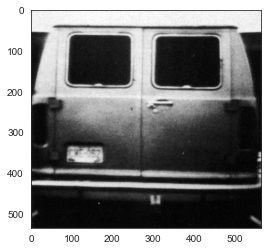

In [55]:
image_path = 'Image/exp3.tif'
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap = 'gray')
# plt.axis('off')
plt.show()

In [5]:
# 其实在做 LoG函数，opencv内置了sobel的梯度方法
# full same valid为三种卷积范围选择方式
gauss = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
sobel_x = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
sobel_y = sobel_x.T

In [62]:
# 卷积求出原图像梯度 采用 cv2.CV_64F格式
ig = cv2.filter2D(image,cv2.CV_32F,gauss)
igx = cv2.filter2D(ig,cv2.CV_32F,sobel_x)
igy = cv2.filter2D(ig,cv2.CV_32F,sobel_y)
M = (igx**2+igy**2)**0.5

# 注意这里算相位
eps = 1e-9
alpha_d = np.divide(igy,igx+eps)  #相位有点问题，还没有解决
alpha = np.arctan(alpha_d)*180/np.pi

ig = np2u8(ig)
igx = np2u8(igx)
igy = np2u8(igy)
M = np2u8(M)


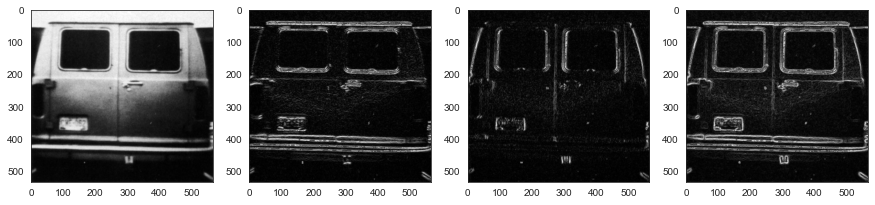

In [40]:
# 如果在前面不转换成 cv2.64f,这里就会是灰色的。
plt.figure(figsize = (15,15))
plt.subplot(141)
plt.imshow(ig,cmap = 'gray')
plt.subplot(142)
plt.imshow(igx,cmap = 'gray')
plt.subplot(143)
plt.imshow(igy,cmap = 'gray')
plt.subplot(144)
plt.imshow(M,cmap = 'gray')

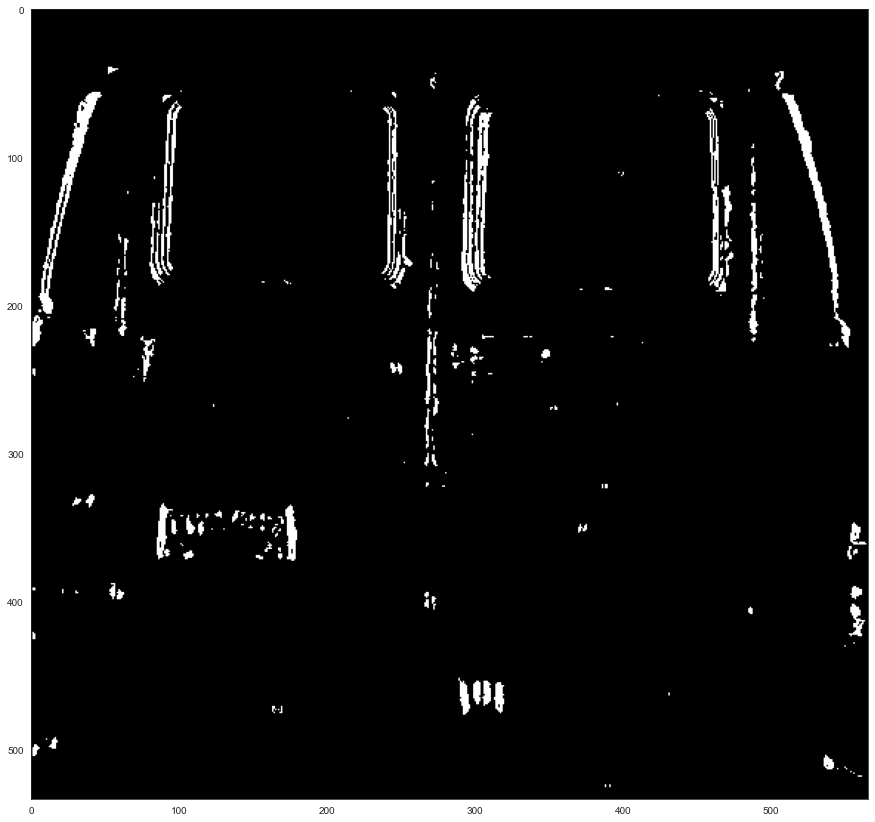

In [76]:
def binimg(M,alpha,Tm):
    bimg = np.zeros_like(M)
    size = M.shape
    for i in range(size[0]):
        for j in range(size[1]):
            Mpoint = M[i,j]
            dpoint  = alpha[i,j]
            if (Mpoint > Tm) & ((dpoint >= -90) & (dpoint <= -45) | (dpoint <= 90) & (dpoint >= 45)):
                bimg[i,j] = 1
    return bimg
            

# 扫描补全图像 水平填充
def scan_horizon(M,alpha,Tm,A,Ta):
    pass

Tm = np.max(np.max(M))*0.3
bimg = binimg(M,alpha,Tm)
plt.figure(figsize = (15,15))
plt.imshow(bimg,cmap = 'gray')

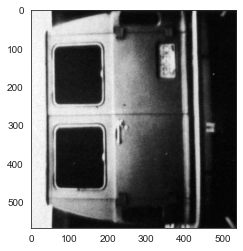

In [60]:
# 转置之后进行相同的步骤，
imaget = image.T
plt.imshow(imaget,cmap = 'gray')
# plt.axis('off')
plt.show()
# 卷积求出原图像梯度 采用 cv2.CV_64F格式
igt = cv2.filter2D(imaget,cv2.CV_32F,gauss)
igxt = cv2.filter2D(igt,cv2.CV_32F,sobel_x)
igyt = cv2.filter2D(igt,cv2.CV_32F,sobel_y)
Mt = (igxt**2+igyt**2)**0.5

# 注意这里算相位
eps = 1e-9
alpha_dt = np.divide(igyt,igxt+eps)  #相位有点问题，还没有解决
alphat = np.arctan(alpha_dt)

igt = np2u8(igt)
igxt = np2u8(igxt)
igyt = np2u8(igyt)
Mt = np2u8(Mt)

igt = igt.T
igxt = igxt.T
igyt = igyt.T
Mt = Mt.T

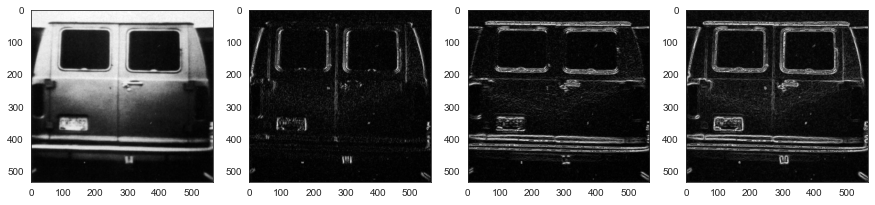

In [61]:
plt.figure(figsize = (15,15))
plt.subplot(141)
plt.imshow(igt,cmap = 'gray')
plt.subplot(142)
plt.imshow(igxt,cmap = 'gray')
plt.subplot(143)
plt.imshow(igyt,cmap = 'gray')
plt.subplot(144)
plt.imshow(Mt,cmap = 'gray')

# 变量浏览区

In [74]:
alpha

array([[  0.       ,  90.       , -90.       , ..., -90.       ,
        -90.       ,   0.       ],
       [  0.       ,   3.764035 , -35.537678 , ..., -22.89055  ,
        -36.347458 ,   0.       ],
       [  0.       ,  -0.2301023, -31.65127  , ...,  25.796024 ,
        -39.040157 ,   0.       ],
       ...,
       [  0.       , -32.39585  , -23.035046 , ..., -29.4236   ,
        -28.865168 ,  -0.       ],
       [  0.       , -16.064184 , -13.928341 , ..., -30.393263 ,
        -18.132864 ,  -0.       ],
       [  0.       , -90.       , -90.       , ...,  90.       ,
         90.       ,   0.       ]], dtype=float32)

In [50]:
cv2.filter2D?